In [ ]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Final Project - BE500
Team members: Grant McConachie, Anjali Gajendiran, Halley Dante
Paper: The Dynamics of Addiction: Craving versus Self-Control

#### Setting up equations

final C: [0.24224909]
final S: [0.3084997]


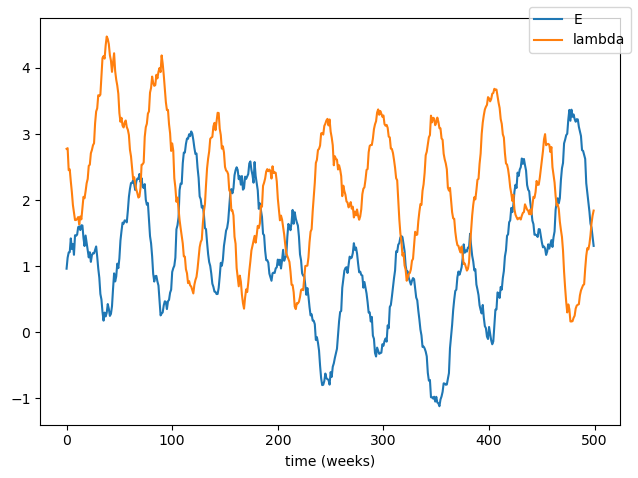

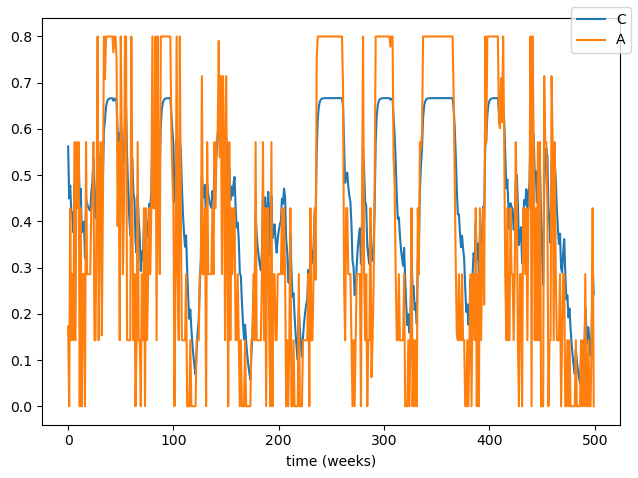

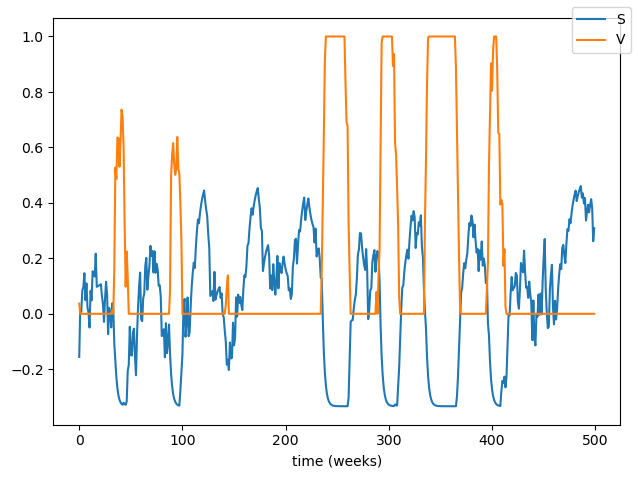

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


SEED = 12345  # unsure how to use this in a point process


# stochastic process functions
def R_fn(lam):
    dist = stats.poisson(lam)
    return dist.rvs(1)


def F_fn(A, q):
    return np.minimum(A, q)


# Variable functions
def V_fn(C, S, E):
    return np.minimum(1, np.maximum(0, C-S-E))


def A_fn(V, stochastic, lam, q=0.8):
    if stochastic:
        return F_fn(
            q * V + R_fn(lam) / 7,
            q
        )
    else:
        return q * V


def gamma_fn(C, b):
    """
    b - cue sensitivity
    """
    return b * np.minimum(1, 1 - C)


# Difference Equations
def C_fn(C, A, b=0.5, d=0.2):
    """
    d - unlearning parameter
    """
    gamma = gamma_fn(C, b)
    return (1 - d) * C + gamma * A


def S_fn(C, S, A, h=0.2, k=0.25, S_plus=0.5, p=0.4):
    """
    p - psychological resiliance parameter
    """
    return S + p * np.maximum(0, S_plus - S) - h * C - k * A


def E_fn(E, dE=0.015):
    return E - dE


def E_sinusodal(E, t, freq=52, var=0.1):
    """
    Change to a sinusodal E
    """
    # convert to radians
    f = 2 * np.pi / freq

    E = E + f * np.cos(f * t) * 0.9

    # add a noise term
    noise = stats.norm(0, var).rvs()

    return E + noise


def lam_sinusodal(lam, t, phase_shift=np.pi, freq=52, var=0.1):
    """
    Also making lambda sinusodal as well
    """
    f = 2 * np.pi / freq

    lam = lam + f * np.cos(f * t + phase_shift)

    noise = stats.norm(0, var).rvs()

    return np.abs(lam + noise)


def lam_fn(lam, dlam=0.01):
    return lam + dlam


# running simulations
stochastic = True
fig_5 = False
sin_E = True
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

for i in range(t):
    if stochastic:
        if fig_5:
            pass
        else:
            if sin_E:
                E = E_sinusodal(E, i)
                lam = lam_sinusodal(lam, i)
            else:
                E = E_fn(E)
                lam = lam_fn(lam)

    V = V_fn(C, S, E)
    A = A_fn(V, stochastic=stochastic, lam=lam)

    C = C_fn(C, A)
    S = S_fn(C, S, A)

    lam_vals.append(lam)
    E_vals.append(E)
    C_vals.append(C)
    S_vals.append(S)
    A_vals.append(A)
    V_vals.append(V)

print(f'final C: {C_vals[-1]}')
print(f'final S: {S_vals[-1]}')

# PLotting

# fig3a/b
if not stochastic:
    pass

# fig4a
fig, axs = plt.subplots()
axs.plot(range(len(E_vals)), E_vals, label='E')
axs.plot(range(len(lam_vals)), lam_vals, label='lambda')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4b
fig, axs = plt.subplots()
axs.plot(range(len(C_vals)), C_vals, label='C')
axs.plot(range(len(A_vals)), A_vals, label='A')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4c
fig, axs = plt.subplots()
axs.plot(range(len(S_vals)), S_vals, label='S')
axs.plot(range(len(V_vals)), V_vals, label='V')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

plt.show()

### Testing hyperparameter - q

In [18]:
parameter_list=np.linspace(0, 3, 31)

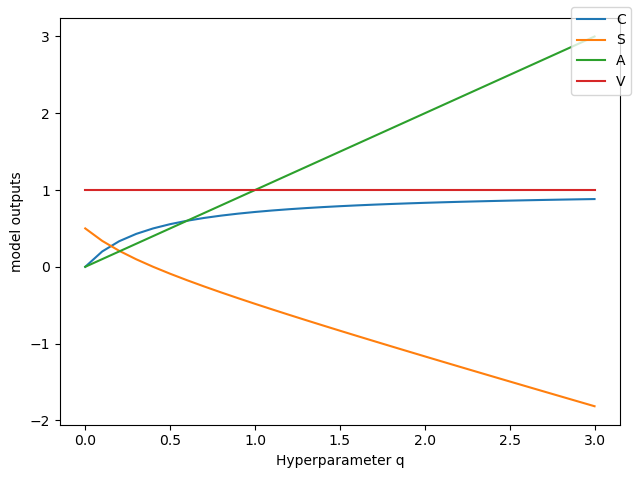

In [19]:
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam, q=param)

        C = C_fn(C, A)
        S = S_fn(C, S, A)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter q')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

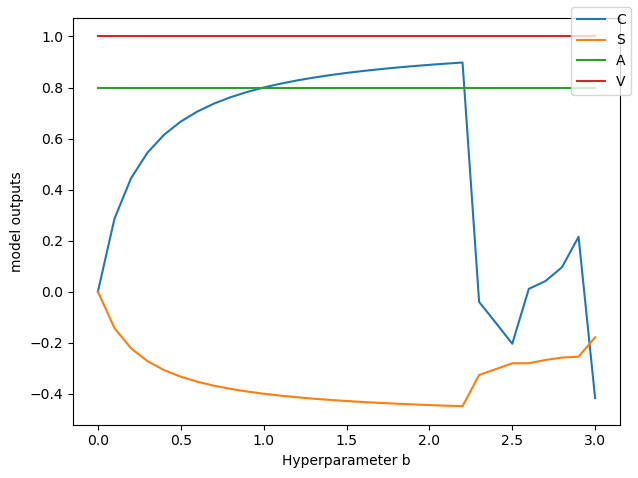

In [21]:
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A, b = param)
        S = S_fn(C, S, A)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter b')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

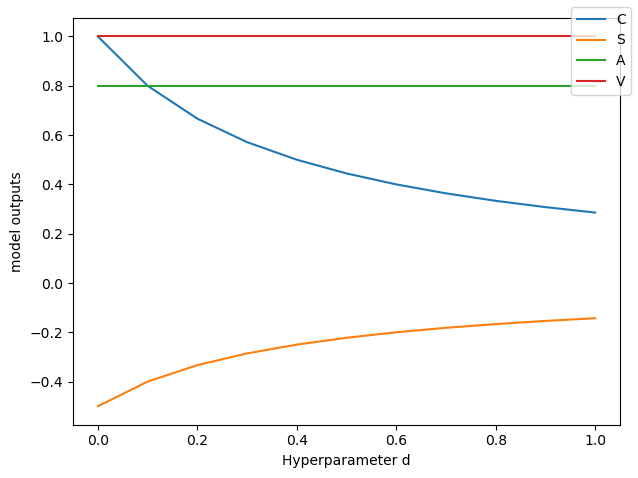

In [27]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A, d = param)
        S = S_fn(C, S, A)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter d')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

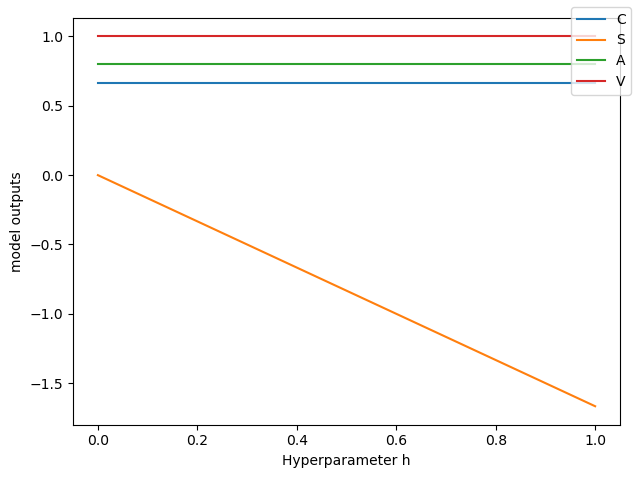

In [29]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A)
        S = S_fn(C, S, A, h = param)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter h')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

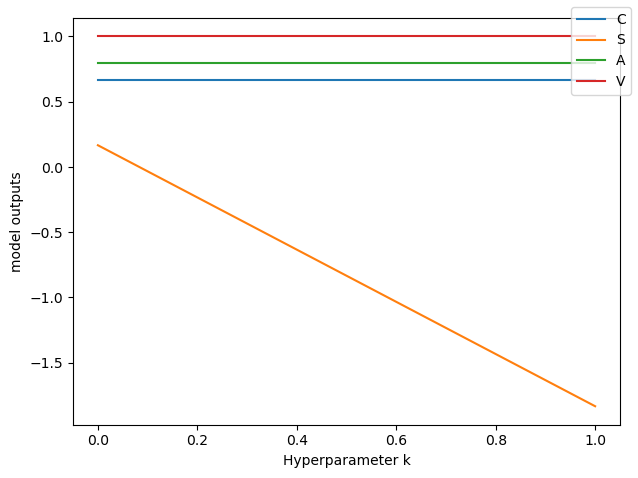

In [31]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A)
        S = S_fn(C, S, A, k = param)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter k')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

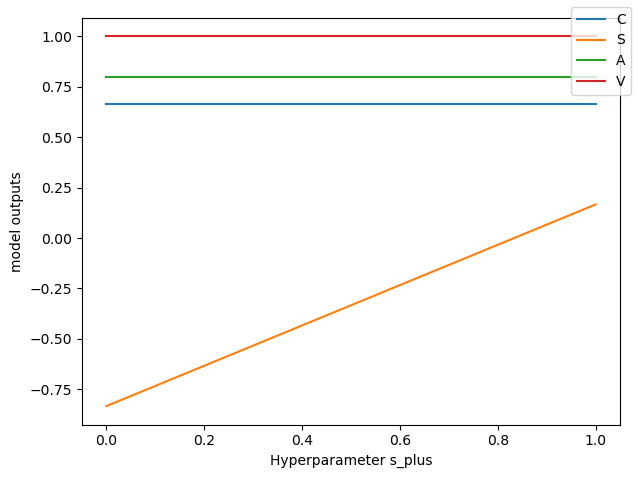

In [41]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A)
        S = S_fn(C, S, A, S_plus=param)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter s_plus')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

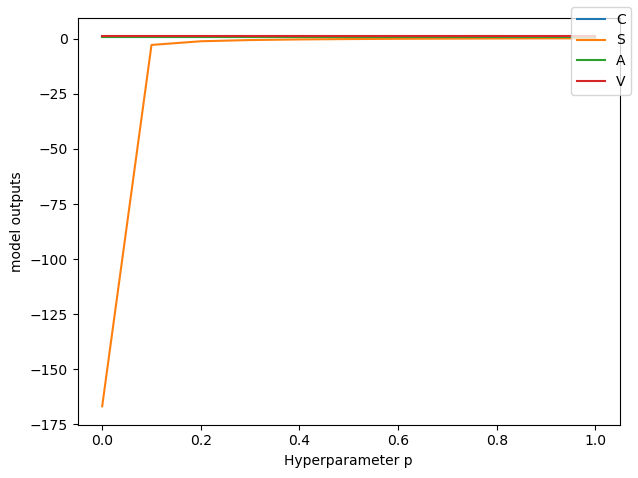

In [36]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A)
        S = S_fn(C, S, A, p=param)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter p')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

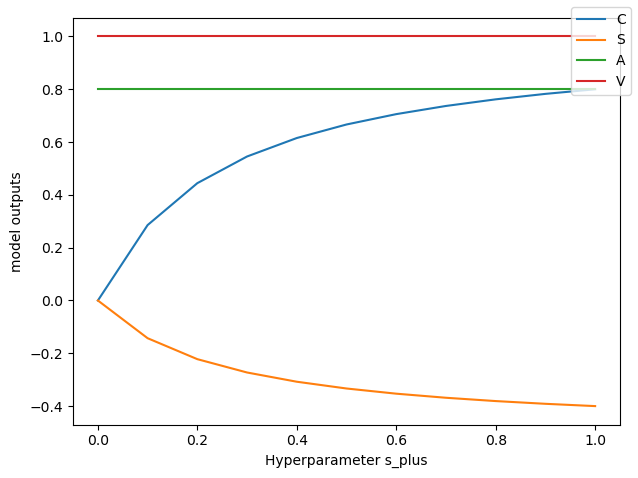

In [35]:
parameter_list=np.linspace(0, 1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A, b=param)
        S = S_fn(C, S, A)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(E_vals[-1])
    C_val_list.append(C_vals[-1])
    S_val_list.append(S_vals[-1])
    A_val_list.append(A_vals[-1])
    V_val_list.append(V_vals[-1])

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter s_plus')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

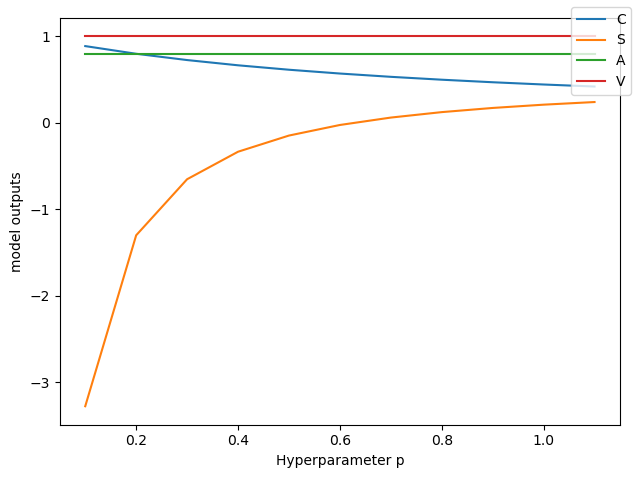

In [46]:
parameter_list=np.linspace(0.1, 1.1, 11)
# running simulations
stochastic = True
fig_5 = False
sin_E = False
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

E_val_list=[]
C_val_list=[]
S_val_list=[]
A_val_list=[]
V_val_list=[]

for param in parameter_list:

    for i in range(t):
        if stochastic:
            if fig_5:
                pass
            else:
                if sin_E:
                    E = E_sinusodal(E, i)
                    lam = lam_sinusodal(lam, i)
                else:
                    E = E_fn(E)
                    lam = lam_fn(lam)

        V = V_fn(C, S, E)
        A = A_fn(V, stochastic=stochastic, lam=lam)

        C = C_fn(C, A, d = param/2)
        S = S_fn(C, S, A, p=param)

        lam_vals.append(lam)
        E_vals.append(E)
        C_vals.append(C)
        S_vals.append(S)
        A_vals.append(A)
        V_vals.append(V)

    E_val_list.append(sum(E_vals[-5:])/len(E_vals[-5:]))
    C_val_list.append(sum(C_vals[-5:])/len(C_vals[-5:]))
    S_val_list.append(sum(S_vals[-5:])/len(S_vals[-5:]))
    A_val_list.append(sum(A_vals[-5:])/len(A_vals[-5:]))
    V_val_list.append(sum(V_vals[-5:])/len(V_vals[-5:]))

    """
    # fig4b
    fig, axs = plt.subplots()
    axs.plot(range(len(C_vals)), C_vals, label='C')
    axs.plot(range(len(A_vals)), A_vals, label='A')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    # fig4c
    fig, axs = plt.subplots()
    axs.plot(range(len(S_vals)), S_vals, label='S')
    axs.plot(range(len(V_vals)), V_vals, label='V')
    axs.set_xlabel('time (weeks)')
    fig.legend()
    fig.tight_layout()

    plt.show()"""

fig, axs = plt.subplots()
axs.plot(parameter_list, C_val_list, label='C')
axs.plot(parameter_list, S_val_list, label='S')
#axs.plot(parameter_list, E_val_list, label='E')
axs.plot(parameter_list, A_val_list, label='A')
axs.plot(parameter_list, V_val_list, label='V')
axs.set_xlabel('Hyperparameter p')
axs.set_ylabel('model outputs')
fig.legend()
fig.tight_layout()

final C: [0.66666667]
final S: [-2.83333333]


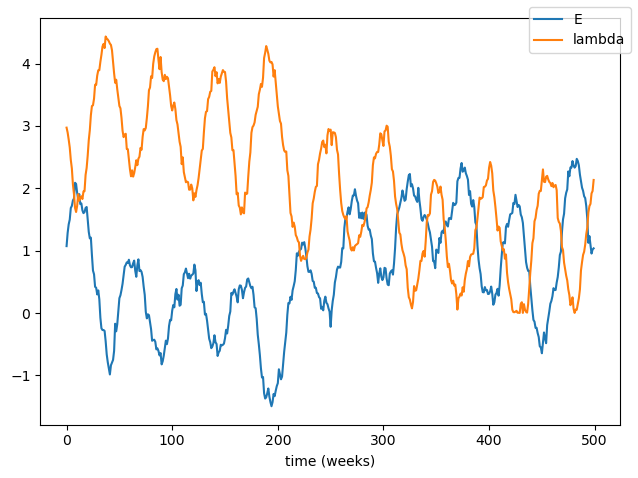

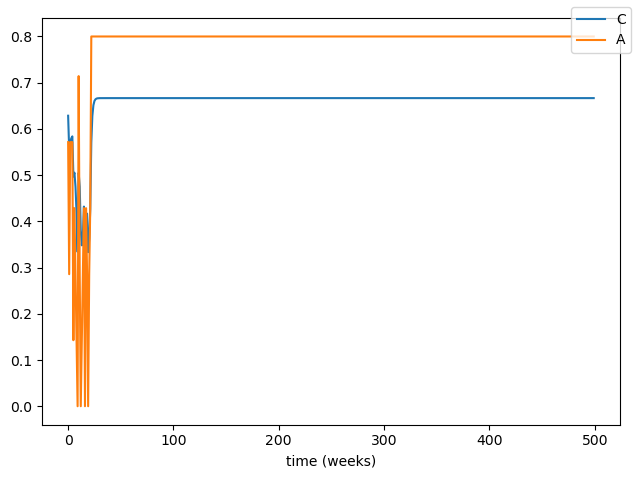

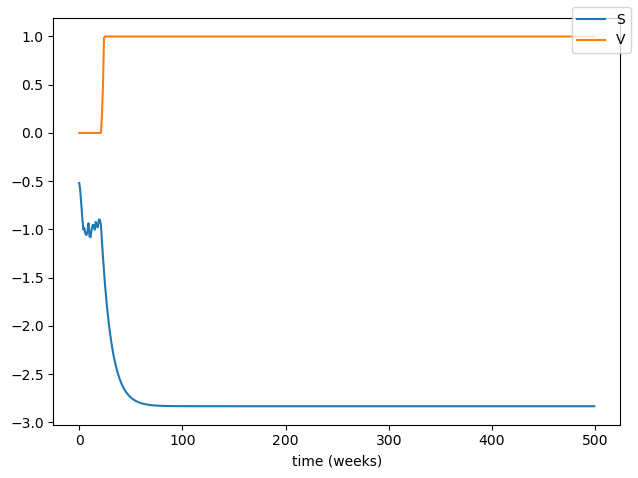

In [43]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


SEED = 12345  # unsure how to use this in a point process


# stochastic process functions
def R_fn(lam):
    dist = stats.poisson(lam)
    return dist.rvs(1)


def F_fn(A, q):
    return np.minimum(A, q)


# Variable functions
def V_fn(C, S, E):
    return np.minimum(1, np.maximum(0, C-S-E))


def A_fn(V, stochastic, lam, q=0.8):
    if stochastic:
        return F_fn(
            q * V + R_fn(lam) / 7,
            q
        )
    else:
        return q * V


def gamma_fn(C, b):
    """
    b - cue sensitivity
    """
    return b * np.minimum(1, 1 - C)


# Difference Equations
def C_fn(C, A, b=0.5, d=0.2):
    """
    d - unlearning parameter
    """
    gamma = gamma_fn(C, b)
    return (1 - d) * C + gamma * A


def S_fn(C, S, A, h=0.2, k=0.25, S_plus=0.5, p=0.4):
    """
    p - psychological resiliance parameter
    """
    return S + p * np.maximum(0, S_plus - S) - h * C - k * A


def E_fn(E, dE=0.015):
    return E - dE


def E_sinusodal(E, t, freq=52, var=0.1):
    """
    Change to a sinusodal E
    """
    # convert to radians
    f = 2 * np.pi / freq

    E = E + f * np.cos(f * t) * 0.9

    # add a noise term
    noise = stats.norm(0, var).rvs()

    return E + noise


def lam_sinusodal(lam, t, phase_shift=np.pi, freq=52, var=0.1):
    """
    Also making lambda sinusodal as well
    """
    f = 2 * np.pi / freq

    lam = lam + f * np.cos(f * t + phase_shift)

    noise = stats.norm(0, var).rvs()

    return np.abs(lam + noise)


def lam_fn(lam, dlam=0.01):
    return lam + dlam


# running simulations
stochastic = True
fig_5 = False
sin_E = True
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

for i in range(t):
    if stochastic:
        if fig_5:
            pass
        else:
            if sin_E:
                E = E_sinusodal(E, i)
                lam = lam_sinusodal(lam, i)
            else:
                E = E_fn(E)
                lam = lam_fn(lam)

    V = V_fn(C, S, E)
    A = A_fn(V, stochastic=stochastic, lam=lam)

    C = C_fn(C, A)
    S = S_fn(C, S, A, p = 0.1)

    lam_vals.append(lam)
    E_vals.append(E)
    C_vals.append(C)
    S_vals.append(S)
    A_vals.append(A)
    V_vals.append(V)

print(f'final C: {C_vals[-1]}')
print(f'final S: {S_vals[-1]}')

# PLotting

# fig3a/b
if not stochastic:
    pass

# fig4a
fig, axs = plt.subplots()
axs.plot(range(len(E_vals)), E_vals, label='E')
axs.plot(range(len(lam_vals)), lam_vals, label='lambda')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4b
fig, axs = plt.subplots()
axs.plot(range(len(C_vals)), C_vals, label='C')
axs.plot(range(len(A_vals)), A_vals, label='A')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4c
fig, axs = plt.subplots()
axs.plot(range(len(S_vals)), S_vals, label='S')
axs.plot(range(len(V_vals)), V_vals, label='V')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

plt.show()

final C: [0.66666667]
final S: [0.08333333]


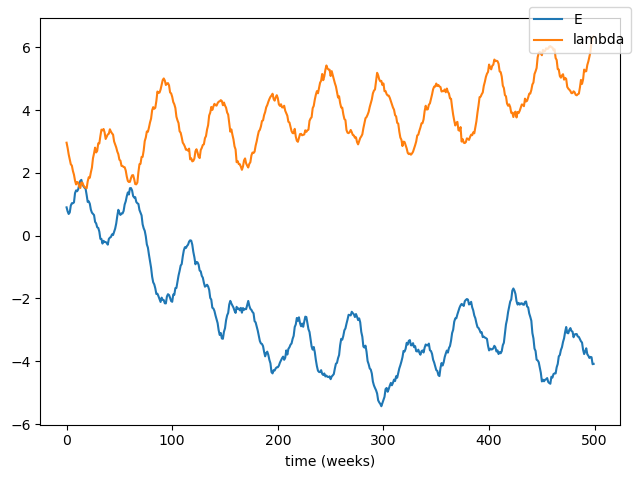

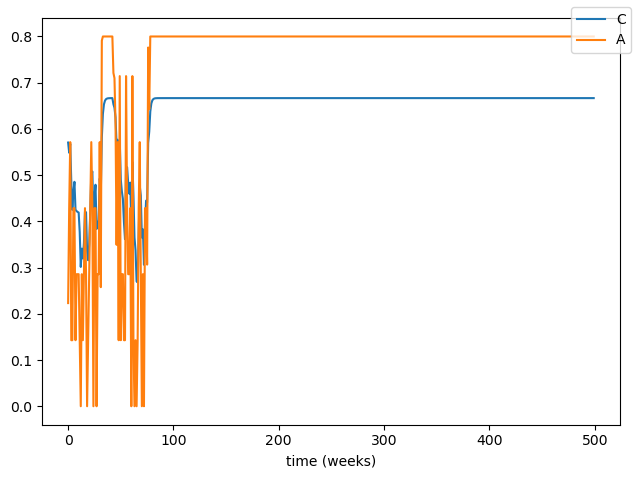

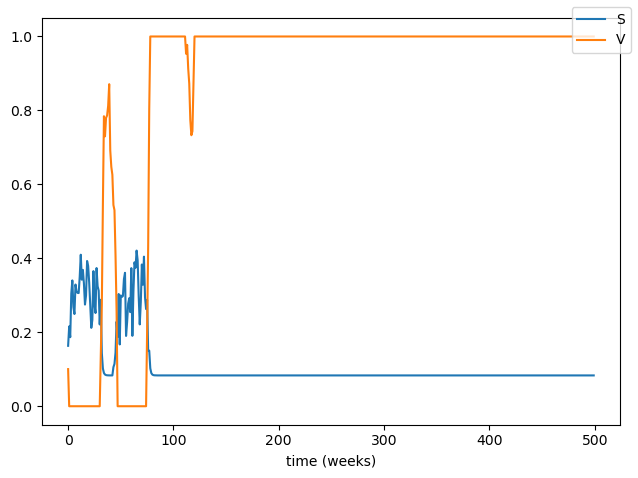

In [45]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


SEED = 12345  # unsure how to use this in a point process


# stochastic process functions
def R_fn(lam):
    dist = stats.poisson(lam)
    return dist.rvs(1)


def F_fn(A, q):
    return np.minimum(A, q)


# Variable functions
def V_fn(C, S, E):
    return np.minimum(1, np.maximum(0, C-S-E))


def A_fn(V, stochastic, lam, q=0.8):
    if stochastic:
        return F_fn(
            q * V + R_fn(lam) / 7,
            q
        )
    else:
        return q * V


def gamma_fn(C, b):
    """
    b - cue sensitivity
    """
    return b * np.minimum(1, 1 - C)


# Difference Equations
def C_fn(C, A, b=0.5, d=0.2):
    """
    d - unlearning parameter
    """
    gamma = gamma_fn(C, b)
    return (1 - d) * C + gamma * A


def S_fn(C, S, A, h=0.2, k=0.25, S_plus=0.5, p=0.4):
    """
    p - psychological resiliance parameter
    """
    return S + p * np.maximum(0, S_plus - S) - h * C - k * A


def E_fn(E, dE=0.015):
    return E - dE


def E_sinusodal(E, t, freq=52, var=0.1):
    """
    Change to a sinusodal E
    """
    # convert to radians
    f = 2 * np.pi / freq

    E = E + f * np.cos(f * t) * 0.9

    # add a noise term
    noise = stats.norm(0, var).rvs()

    return E + noise


def lam_sinusodal(lam, t, phase_shift=np.pi, freq=52, var=0.1):
    """
    Also making lambda sinusodal as well
    """
    f = 2 * np.pi / freq

    lam = lam + f * np.cos(f * t + phase_shift)

    noise = stats.norm(0, var).rvs()

    return np.abs(lam + noise)


def lam_fn(lam, dlam=0.01):
    return lam + dlam


# running simulations
stochastic = True
fig_5 = False
sin_E = True
C_vals = []
S_vals = []
lam_vals = []
E_vals = []
A_vals = []
V_vals = []

# initial values (taken from their excel)
C_0 = np.array([2/3])
A_0 = np.array([4/5])
S_0 = np.array([-1/3])
E_0 = np.array([1])
V_0 = V_fn(C_0, S_0, E_0)
lam_0 = np.array([3])
t = 500  # weeks

# fig 5
if fig_5:
    E_0 = np.array([0.1525])
    lam_0 = np.array([1])
    S_0 = np.array([0.5])
    V_0 = np.array([0.3])
    t = 500  # weeks

C = C_0
A = A_0
S = S_0
V = V_0
E = E_0
lam = lam_0

for i in range(t):
    if stochastic:
        if fig_5:
            pass
        else:
            if sin_E:
                E = E_sinusodal(E, i)
                lam = lam_sinusodal(lam, i)
            else:
                E = E_fn(E)
                lam = lam_fn(lam)

    V = V_fn(C, S, E)
    A = A_fn(V, stochastic=stochastic, lam=lam)

    C = C_fn(C, A)
    S = S_fn(C, S, A, p = 0.8)

    lam_vals.append(lam)
    E_vals.append(E)
    C_vals.append(C)
    S_vals.append(S)
    A_vals.append(A)
    V_vals.append(V)

print(f'final C: {sum(C_vals[-5:])/len(C_vals[-5:])}')
print(f'final S: {sum(S_vals[-5:])/len(S_vals[-5:])}')

# PLotting

# fig3a/b
if not stochastic:
    pass

# fig4a
fig, axs = plt.subplots()
axs.plot(range(len(E_vals)), E_vals, label='E')
axs.plot(range(len(lam_vals)), lam_vals, label='lambda')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4b
fig, axs = plt.subplots()
axs.plot(range(len(C_vals)), C_vals, label='C')
axs.plot(range(len(A_vals)), A_vals, label='A')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

# fig4c
fig, axs = plt.subplots()
axs.plot(range(len(S_vals)), S_vals, label='S')
axs.plot(range(len(V_vals)), V_vals, label='V')
axs.set_xlabel('time (weeks)')
fig.legend()
fig.tight_layout()

plt.show()